No código abaixo vou resolver um problema de dados desbalanceados
### 1 -  Importando as bibliotecas que vou usar


In [1]:
import pandas as pd
import random
import numpy as np

### 2 - Carregando o dataset. Este dataset tem como target a coluna "default"

In [3]:
dataset = pd.read_csv("..\credit_data.csv")
dataset.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


##### Acima nós temos "clientid" = id do cliente, "income" = renda do cliente, "age" = idade, "loan" = dívida e "default" = que indica se o cliente pagou ou não. 0 que pagou e 1 que não pagou. Provavelmente é a base de dados de um banco.

In [4]:
### Código abaixo para saber se temos algum dado faltante
dataset.isna().sum()

### Código abaixo caso precise de apagar poucos registros NA. 
dataset.dropna(inplace=True)

In [5]:
# Este dataset contem 1997 registros e 5 colunas
dataset.shape

(1997, 5)

##### Agora vou importar a biblioteca seaborn e imprimir um gráfico que mostra o desbalanceamento da coluna default.

c:\Users\Dorimar Tirre\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


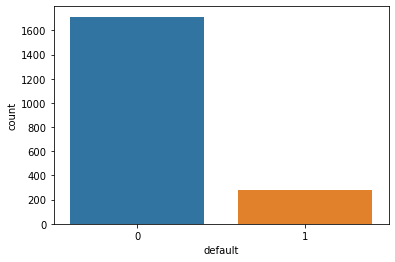

In [6]:
import seaborn as sns
sns.countplot(dataset['default']);

##### Agora vou dividir a base de dados em atributos previsores "X" que é a renda, idade e a dívida. A outra parte é a variável "y" somente para o target.  

In [7]:
X = dataset.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [8]:
y = dataset.iloc[:, 4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 3 -  Divisão da base de treinamento e base de teste

In [ ]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Abaixo em train_test_split vamos definir o atributo test_size em 20% para teste, 80% para fazer o treinamento 
# e o campo stratify=y para definir que ele vai fazer uma amostra estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
# Vamos observar o tamanho das variáveis de treinamento que equivalem a 80% da base de dados
X_train.shape, y_train.shape

((1597, 3), (1597,))

In [ ]:
# Das variáveis de teste que equivalem a 20% da base de dados
X_test.shape, y_test.shape

((400, 3), (400,))

In [ ]:
np.unique(y, return_counts = True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [ ]:
# Quando geramos uma amostra estratificada usando o parâmetro stratify em train_test_split esperamos que tanto na base de treinamento 
# como na base de teste ele mantenha essa proporção.

print("Classe 0, clientes que pagam = {}% // Classe 1, clientes que não pagam = {}%".format(round(1714 / len(dataset) * 100, 2), round(283 / len(dataset) * 100, 2)))

Classe 0, clientes que pagam = 85.83% // Classe 1, clientes que não pagam = 14.17%


In [ ]:
np.unique(y_train, return_counts = True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [ ]:
print("Classe 0 = {}%".format(round(226 / len(y_train) * 100, 2)))

Classe 0 = 14.15%


In [ ]:
np.unique(y_test, return_counts= True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [ ]:
print("Classe 0 = {}%".format(round(57 / len(y_test) * 100, 2)))

Classe 0 = 14.25%
